# Logistic Regression Predictor – Heart Disease

### Project Description:
This project explores the application of logistic regression for predicting the 10-year risk of coronary heart disease (CHD) using the publicly available Framingham Heart Study dataset. Through implementation of both custom gradient descent and scikit-learn’s logistic regression models, this project aims to compare performance across regularized and non-regularized models. The analysis includes model training, testing, evaluation, and exploration of performance challenges.

### Objectives:
* Implement logistic regression from scratch using gradient descent, including both standard and L2-regularized versions.
* Evaluate and compare model performance using log loss, confusion matrix, and classification metrics (precision, recall, f1-score).
* Use scikit-learn’s LogisticRegression to benchmark results and observe convergence behaviors.
* Analyze the effect of class imbalance on model performance, particularly on recall for the minority class.

### Public dataset source:
[Kaggle Heart Disease Prediction Data Set](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression)
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [137]:
# Import libraries
import pandas as pd
# import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import autograd
from autograd import grad
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, classification_report

In [11]:
# Establish file path and import data
path = 'heart_disease_prediction_data.csv'
df = pd.read_csv(path)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [94]:
def logistic_model(X,y_true,alpha,max_its):
    # Initialize weights
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    cost_history = []

    for k in range(max_its):
        # Computer linear combination
        # Equivalent to X^T dot W
        z = X @ w + b
        #Clip z to prevent overflow in exp
        # z = np.clip(z, -500, 500)
        # Apply the sigmoid function to get prediction
        y_pred = 1 / (1 + np.exp(-z))
        
        # Clip for numerical stability
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon) 
        
        # Compute loss
        log_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        # Gradient descent
        grad_w = (X.T @ (y_pred - y_true)) / n_samples
        grad_b = np.sum(y_pred - y_true) / n_samples

        # Update parameters
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Recompute loss
        cost_history.append(log_loss)

        # Print every 100 iterations
        if k % 100 == 0:
            print(f"Iteration {k}: log loss = {log_loss:.4f}")
    return cost_history, w, b
    

In [ ]:
# Assign features and target
cols = ['age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose'] 
X = df[cols].values
X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6) # There are Nan values in X
y = df['TenYearCHD'].values # 10 year risk of coronary heart disease CHD

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
# Run the model
cost_history, w, b = logistic_model(X_train, y_train, alpha=0.0001, max_its=1000)

print("Learned weights:", w)
print("Intercept (b):", b)

Iteration 0: log loss = 0.6931
Iteration 100: log loss = 0.4344
Iteration 200: log loss = 0.4291
Iteration 300: log loss = 0.4254
Iteration 400: log loss = 0.4229
Iteration 500: log loss = 0.4210
Iteration 600: log loss = 0.4196
Iteration 700: log loss = 0.4185
Iteration 800: log loss = 0.4177
Iteration 900: log loss = 0.4170
Learned weights: [ 0.01299961 -0.00288027 -0.00032512  0.01063011  0.00043393  0.00014152
  0.00235764  0.00033767 -0.0039659   0.01624741 -0.01501058 -0.01797544
 -0.03121035  0.00527281]
Intercept (b): -0.0009814646746594351


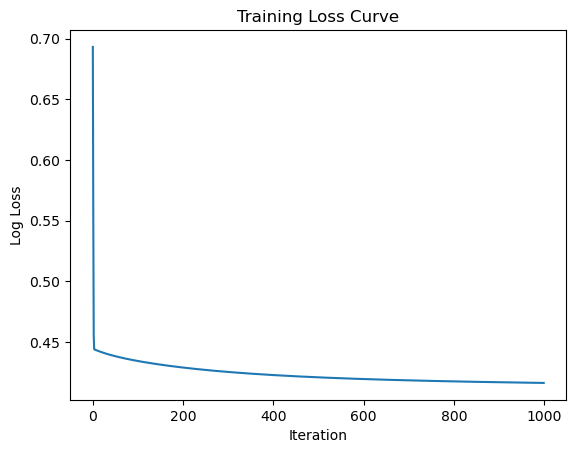

In [105]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Training Loss Curve")
plt.show()

In [100]:
def logit_predict(X,y_true,w,b):
    z = X @ w + b
    y_pred = 1 / (1 + np.exp(-z))
    log_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return log_loss

In [103]:
test_loss = logit_predict(X_test, y_test, w , b)

print("Test loss:", test_loss)

Test loss: 0.4158411852148352


The training loss over time smoothly decreases with no erratic jumps and approaches a typical value for a decent classifier. The test loss is better than random and close to the training loss, which, for a simple logistic regression model without regularization, is a good baseline.

Training a model on an imbalanced dataset (classe) might cause it to favor the majority and be wrong in the minority, leading to a higher loss.

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([2510,  456]))

## L2 Regularization

L2 regularization (aka Ridge penalty) helps to prevent overfitting by penalizing large weights.

In [113]:
def L2_logistic_model(X, y_true, alpha=0.01, max_its=1000, reg_lambda=0.1):
    n_samples, n_features = X.shape
    # w = np.zeros(n_features)
    w = np.random.normal(0, 0.01, size=n_features)
    b = 0.0
    cost_history = []
    
    for k in range(max_its):
        z = X @ w + b
        y_pred = 1 / (1 + np.exp(-z))
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

        # L2-regularized loss
        log_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        l2_penalty = (reg_lambda / (2 * n_samples)) * np.sum(w ** 2)
        total_loss = log_loss + l2_penalty

        # Gradient with L2
        grad_w = (X.T @ (y_pred - y_true)) / n_samples + (reg_lambda / n_samples) * w
        grad_b = np.sum(y_pred - y_true) / n_samples

        w -= alpha * grad_w
        b -= alpha * grad_b

        cost_history.append(total_loss)

        if k % 100 == 0:
            print(f"Iteration {k}: total loss = {total_loss:.4f}")
    return cost_history, w, b


In [115]:
cost_history, w, b = L2_logistic_model(X_train, y_train, alpha=0.0001, max_its=1000)

print("Learned weights:", w)
print("Intercept (b):", b)

Iteration 0: total loss = 0.6813
Iteration 100: total loss = 0.4416
Iteration 200: total loss = 0.4350
Iteration 300: total loss = 0.4306
Iteration 400: total loss = 0.4272
Iteration 500: total loss = 0.4247
Iteration 600: total loss = 0.4227
Iteration 700: total loss = 0.4211
Iteration 800: total loss = 0.4198
Iteration 900: total loss = 0.4188
Learned weights: [ 0.00573789 -0.00780144 -0.00715728  0.00818497 -0.00283553 -0.0033222
  0.00508599  0.00311879 -0.00370077  0.01675258 -0.01352605 -0.01552556
 -0.03011105  0.00530281]
Intercept (b): -0.0009019435868228638


In [120]:
def L2_logit_predict(X,y_true,w,b, reg_lambda = 0.1):
    z = X @ w + b
    y_pred = 1 / (1 + np.exp(-z))
    log_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    l2_penalty = (reg_lambda / (2 * n_samples)) * np.sum(w ** 2)
    total_loss = log_loss + l2_penalty
    return total_loss

In [122]:
total_loss = L2_logit_predict(X_test, y_test, w , b)

print("Test loss:", total_loss)

Test loss: 0.4164469804049391


L2 training loss is slightly higher because I added a penalty term to discourage large weights, but the difference between the two is very small. Test loss is almost identical, which may suggest that the model is not overfitting in the first place. Also, the data are relatively clean and low dimensional.

## Scikit-Learn

In [130]:
# Fit sklearn logistic regression
reg_lambda = 0.1
# model = LogisticRegression(penalty='l2', C=1/reg_lambda, solver='lbfgs', max_iter=1000)
model = LogisticRegression(penalty='l2', C=1/reg_lambda, solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)

# Predictions
y_pred_prob = model.predict_proba(X_test)[:, 1] # Raw probabilities
y_pred = model.predict(X_test) # Predicted classes

# Evaluate
test_log_loss = log_loss(y_test, y_pred_prob)

print("Scikit-learn Test Log Loss:", test_log_loss)


Scikit-learn Test Log Loss: 0.38161662995104506


In [134]:
# Mean accuracy
model.score(X_test,y_test)

0.8584905660377359

In [135]:
print(confusion_matrix(y_test,y_pred))

[[1076    8]
 [ 172   16]]


In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.67      0.09      0.15       188

    accuracy                           0.86      1272
   macro avg       0.76      0.54      0.54      1272
weighted avg       0.83      0.86      0.81      1272



The recall may be very low once again because of the class imbalance. Could potentially use class weighting to improve this performance by penalizing when the model misclassifies the minority class more heavily.